In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from collections import Counter

In [55]:
init_notebook_mode(connected=True)

In [47]:
dataset = pd.read_json(r'C:\Users\Ольга\Downloads\ML\L3\posts_comments_2.json', lines=True, encoding='utf8')
posts_comments = dataset['text']
posts_comments.head()

0    [id1200993|Ваня], в корне не согласен с тем, ч...
1    [id1200993|Ваня], 60 на мотоцикле весом в 300к...
2    [id304378|Kapitan], старушка, будь не выжившей...
3    [id6835332|Алексей], ну по городу гонять я не ...
4    [id304378|Kapitan], когда я еду на гольфе с 10...
Name: text, dtype: object

In [48]:
vect = CountVectorizer(max_df=0.5)
X = vect.fit_transform(posts_comments)

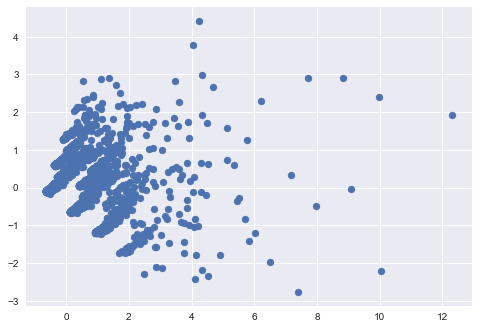

In [49]:
#снижение размерности 
X_reduced = PCA(n_components=2).fit_transform(X.toarray())
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.show()

In [50]:
tfidf_vect = TfidfVectorizer(max_df=0.5, min_df=10)
X_weighted = tfidf_vect.fit_transform(posts_comments)

In [51]:
X_weighted_reduced = PCA(n_components=2).fit_transform(X_weighted.toarray())

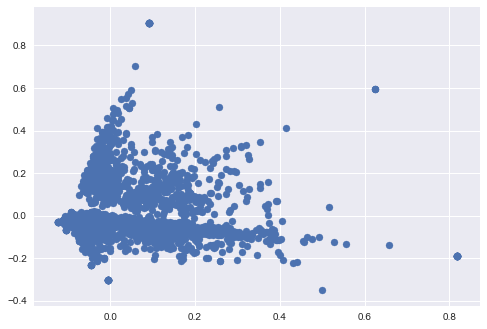

In [52]:
plt.scatter(X_weighted_reduced[:, 0], X_weighted_reduced[:, 1])
plt.show()

In [53]:
X_weighted_reduced3d = PCA(n_components=3).fit_transform(X_weighted.toarray())

In [64]:
x, y, z = X_weighted_reduced3d[:, 0], X_weighted_reduced3d[:, 1], X_weighted_reduced3d[:, 2]

trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        line=dict(
            color='rgba(217, 217, 217)',
            width=0.5
        ),
        opacity=1
    )
)


data = [trace]
layout = go.Layout(
    title='PCA with 3 PCs',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

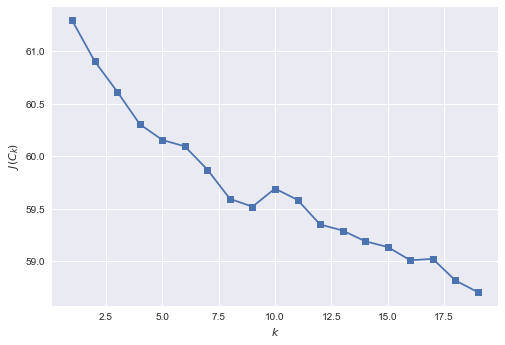

Wall time: 4min 13s


In [58]:
%%time

inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_weighted)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 20), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

In [59]:
kmeans = KMeans(n_clusters=4).fit(X_weighted)

In [60]:
clusters = kmeans.labels_.tolist()

In [61]:
encoder = {
    0: '#0000FF',
    1: '#04B404',
    2: '#B40404',
    3: '#2E2E2E'
}
coloring = [encoder[i] for i in clusters]

In [62]:
X_weighted_reduced3d = PCA(n_components=3).fit_transform(X_weighted.toarray())

In [65]:
x, y, z = X_weighted_reduced3d[:, 0], X_weighted_reduced3d[:, 1], X_weighted_reduced3d[:, 2]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    
    marker=dict(
        size=4,
        color=coloring,
        line=dict(
            color='rgba(217, 217, 217)',
            width=1
        ),
        opacity=1
    )
)


data = [trace1]
layout = go.Layout(
    title='PCA with 3 PCs',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)